# Snippets para personalizar el contenido de nuestras visualizaciones

## Preparación

#### Importar librerías

In [1]:
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.colors import ListedColormap

import seaborn as sns

#### Cargar dataset

In [3]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Mostrar visualización por defecto

In [7]:
species_count = df['species'].value_counts().reset_index()

Un gráfico por defecto:

<Axes: xlabel='species', ylabel='count'>

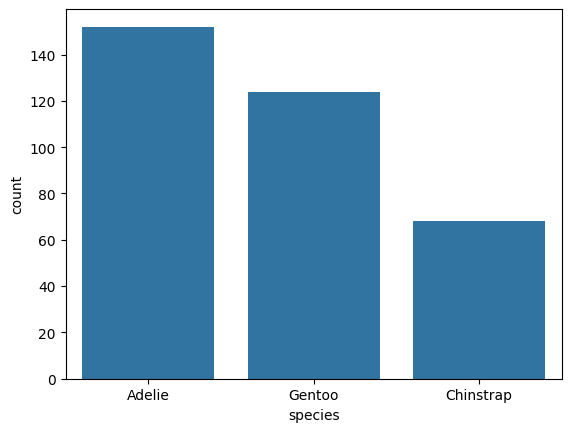

In [8]:
sns.barplot(data=species_count, x='species',y='count')

## Customizar el canvas

Podemos definir la grilla y el tamaño del canvas con la función 
```
plt.subplots(filas:int,columnas:int,*kwargs:any)
```

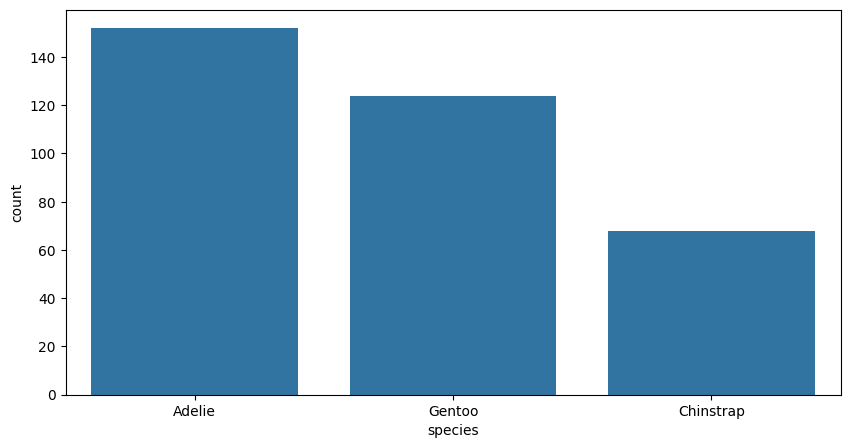

In [10]:
fig, ax = plt.subplots(1, 1, figsize=[10, 5])

ax = sns.barplot(data=species_count, x='species',y='count')

plt.show()

## Agregar título a nuestro gráfico

Usamos la función `plt.title(titulo:str)`

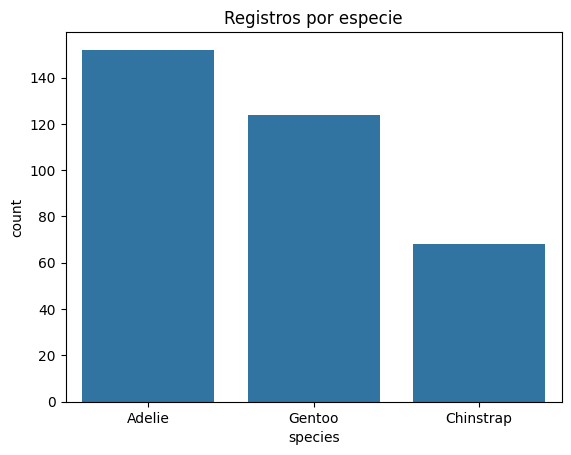

In [17]:
ax = sns.barplot(data=species_count, x='species',y='count')

plt.title('Registros por especie')
plt.show()

## Agregar valores en el gráfico

Cada gráfico tiene un objeto que agrupa los `artists` (elementos a renderizarse).  
Por cada `artist` debemos setear el label correspondiente en nuestro gráfico.

La documentación también nos indica que podemos personalizar estas etiquetas

[<BarContainer object of 3 artists>]


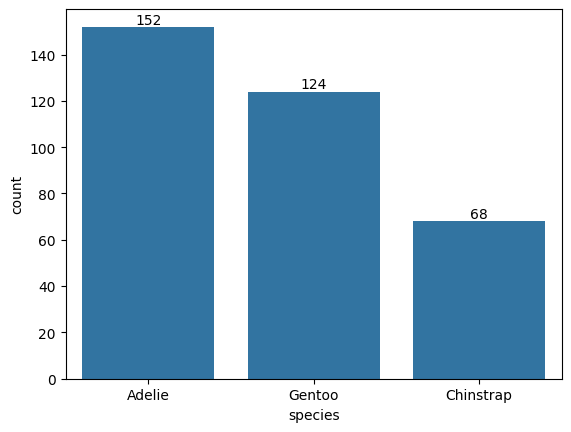

In [15]:
ax = sns.barplot(data=species_count, x='species',y='count')

for i in ax.containers:
    ax.bar_label(i,)

## Quitar valores del eje y

Cuando creamos nuestro gráfico, debemos setear con un array vacío las marcas de referencia y sus etiquetas de nuestro eje y usando la función
```
set_yticks(array:np.arr)
```

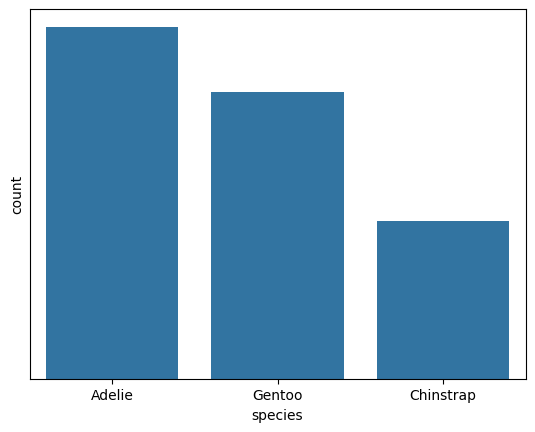

In [29]:
ax = sns.barplot(data=species_count, x='species',y='count')

ax.set_yticks([])

plt.show()

## Quitar titulos de los ejes

Podemos omitir los títulos de cada eje usando `None` como argumento en las funciones
```
set_ylabel(titulo_del_eje:str)
set_xlabel(titulo_del_eje:str)
```

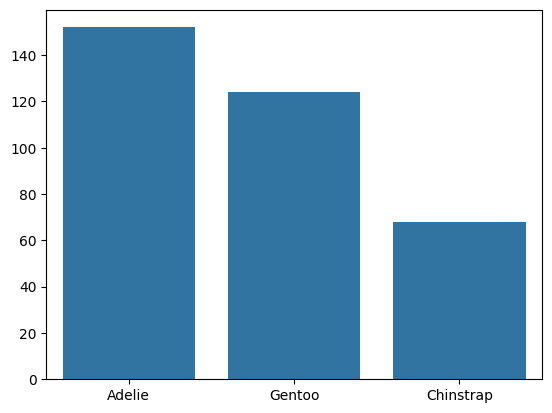

In [31]:
ax = sns.barplot(data=species_count, x='species',y='count')

ax.set_ylabel(None)
ax.set_xlabel(None)

plt.show()